# **Imports and Data reading**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
housing = pd.read_csv('housing_data_CDMX_v2.csv')
housing.head()

,property_type,places,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,lat,lon
0,apartment,MiguelHidalgo,"23.634501,-102.552788",5500000.0,MXN,5450245.50,289775.66,54.0,54.0,5366.215926,101851.85190,23.634501,-102.552788
1,house,Iztapalapa,"19.31033,-99.068557",1512000.0,MXN,1498321.97,79661.96,80.0,80.0,995.774500,18900.00000,19.310330,-99.068557
2,apartment,Tlalpan,"19.279771,-99.234597",926667.0,MXN,918284.00,48822.82,100.0,100.0,488.228200,9266.67000,19.279771,-99.234597
3,apartment,MiguelHidalgo,"23.634501,-102.552788",6410000.0,MXN,6352013.39,337720.36,135.0,135.0,2501.632296,47481.48148,23.634501,-102.552788
4,apartment,MiguelHidalgo,"19.432657,-99.177444",4416000.0,MXN,4376051.62,232663.51,87.0,87.0,2674.293218,50758.62069,19.432657,-99.177444


In [4]:
housing.shape

(18234, 13)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18234 entries, 0 to 18233
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_type               18234 non-null  object 
 1   places                      18234 non-null  object 
 2   lat-lon                     18234 non-null  object 
 3   price                       18234 non-null  float64
 4   currency                    18234 non-null  object 
 5   price_aprox_local_currency  18234 non-null  float64
 6   price_aprox_usd             18234 non-null  float64
 7   surface_total_in_m2         18234 non-null  float64
 8   surface_covered_in_m2       18234 non-null  float64
 9   price_usd_per_m2            18234 non-null  float64
 10  price_per_m2                18234 non-null  float64
 11  lat                         18234 non-null  float64
 12  lon                         18234 non-null  float64
dtypes: float64(9), object(4)
memory

## Drop duplicated rows

In [7]:
# Checking for duplicates
housing.duplicated().sum()

2953

In [8]:
housing=housing.drop_duplicates()   #dropping duplicates
housing.shape

(15281, 13)

In [9]:
pd.set_option("display.float_format", "{:.2f}".format)
housing.describe()

,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,lat,lon
count,15281.00,15281.00,15281.00,15281.00,15281.00,15281.00,15281.00,15281.00,15281.00
mean,3751467.95,5481206.12,291421.76,4825.55,4798.66,1506.48,24289.09,19.44,-99.21
std,5874121.48,10277686.36,546438.38,532272.68,532271.38,2282.32,43593.58,0.51,0.40
min,7000.00,109030.61,5796.88,1.00,1.00,0.00,0.01,19.19,-102.55
25%,1029394.00,1090049.06,57955.13,70.00,70.00,658.58,11089.25,19.35,-99.20
50%,2000000.00,2298021.58,122179.95,100.00,100.00,1063.82,17714.29,19.39,-99.16
75%,4110000.00,4954768.48,263432.41,205.00,218.00,1895.81,31944.44,19.43,-99.13
max,233726700.00,336484065.00,17890000.00,65748000.00,65748000.00,175917.69,3338952.86,41.58,-90.49


# **Analysing Correlation Between Fields**

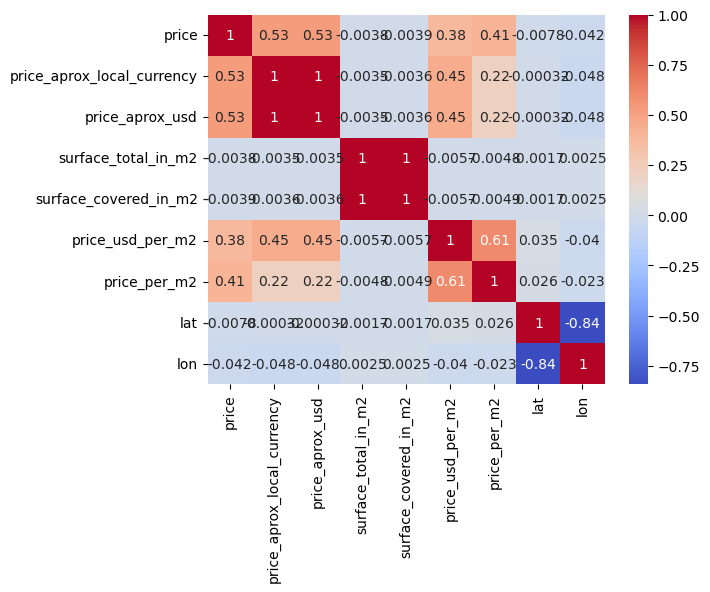

In [11]:
#There an medium positive correlation here between prices
corr=housing.select_dtypes(include="number").corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [12]:
#Two Categories for Currency
housing["currency"].unique()

array(['MXN', 'USD'], dtype=object)

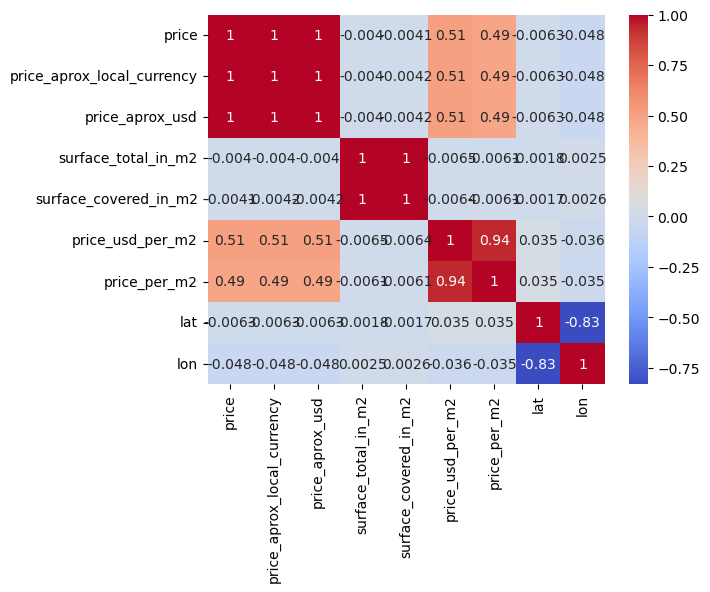

In [13]:
# We made correlation based on currency Mexican alone
# Now the picture better but we need to se if it's the same with currency USD alone
MXcorr=housing[housing["currency"]=="MXN"] .select_dtypes(include="number").corr()
sns.heatmap(MXcorr, annot=True, cmap="coolwarm")
plt.show()

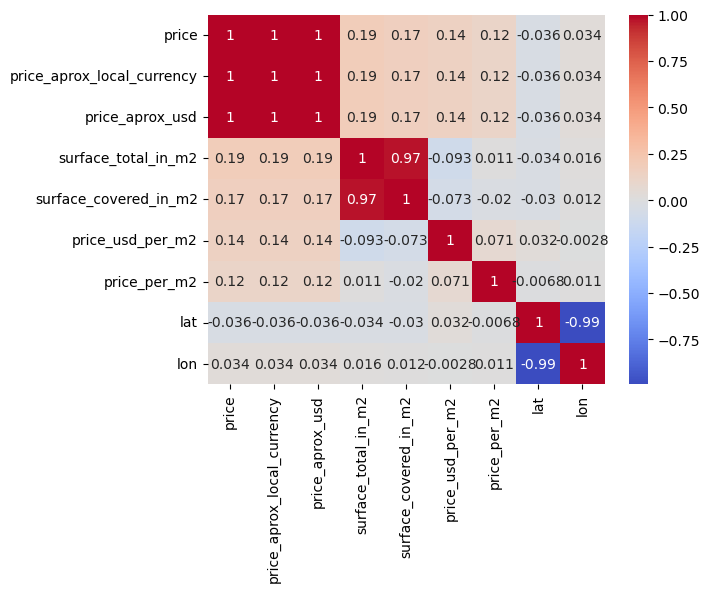

In [14]:
# We made correlation based on currency USD
#For every currency the three fields are representing the same thing
USDcorr =housing[housing["currency"]=="USD"] .select_dtypes(include="number").corr()
sns.heatmap(USDcorr, annot=True, cmap="coolwarm")
plt.show()

Here We decided to Make the Data in USD only

In [16]:
housing=housing.drop(["price","currency","price_per_m2","price_aprox_local_currency"],axis=1).copy()
housing.head()

,property_type,places,lat-lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,lat,lon
0,apartment,MiguelHidalgo,"23.634501,-102.552788",289775.66,54.00,54.00,5366.22,23.63,-102.55
1,house,Iztapalapa,"19.31033,-99.068557",79661.96,80.00,80.00,995.77,19.31,-99.07
2,apartment,Tlalpan,"19.279771,-99.234597",48822.82,100.00,100.00,488.23,19.28,-99.23
3,apartment,MiguelHidalgo,"23.634501,-102.552788",337720.36,135.00,135.00,2501.63,23.63,-102.55
4,apartment,MiguelHidalgo,"19.432657,-99.177444",232663.51,87.00,87.00,2674.29,19.43,-99.18


In [17]:
housing.describe()

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,lat,lon
count,15281.00,15281.00,15281.00,15281.00,15281.00,15281.00
mean,291421.76,4825.55,4798.66,1506.48,19.44,-99.21
std,546438.38,532272.68,532271.38,2282.32,0.51,0.40
min,5796.88,1.00,1.00,0.00,19.19,-102.55
25%,57955.13,70.00,70.00,658.58,19.35,-99.20
50%,122179.95,100.00,100.00,1063.82,19.39,-99.16
75%,263432.41,205.00,218.00,1895.81,19.43,-99.13
max,17890000.00,65748000.00,65748000.00,175917.69,41.58,-90.49


Here We did feature engineering getting surface_uncovered_in_m2

In [19]:
housing["surface_uncovered_in_m2"]=housing["surface_total_in_m2"]-housing["surface_covered_in_m2"]

In [20]:
housing.query("surface_uncovered_in_m2 !=0").describe()

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,lat,lon,surface_uncovered_in_m2
count,1618.00,1618.00,1618.00,1618.00,1618.00,1618.00,1618.00
mean,698016.69,664.69,410.74,1888.86,19.36,-99.18,253.95
std,878575.44,4063.42,1095.67,1646.03,0.06,0.06,3902.09
min,12120.76,10.00,1.00,1.03,19.19,-99.33,-1480.00
25%,166001.78,148.00,175.00,865.76,19.32,-99.22,-101.00
50%,393614.82,248.50,300.00,1436.36,19.36,-99.18,-20.00
75%,869533.13,518.50,497.50,2360.86,19.40,-99.14,66.00
max,9000000.00,84500.00,42500.00,20618.85,19.56,-98.99,84266.00


In [21]:
# WOW 880 Rows have logical Errors
housing.query("surface_uncovered_in_m2 <0")

,property_type,places,lat-lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,lat,lon,surface_uncovered_in_m2
34,house,Coyoacan,"19.307427366,-99.1170322895",305654.07,200.00,263.00,1528.27,19.31,-99.12,-63.00
57,house,Iztapalapa,"19.3383626772,-99.0706713125",94858.16,160.00,200.00,592.86,19.34,-99.07,-40.00
63,house,Iztacalco,"19.381207,-99.0978814",168636.73,180.00,264.00,936.87,19.38,-99.10,-84.00
86,house,MiguelHidalgo,"19.401079,-99.24807",711267.53,591.00,650.00,1203.50,19.40,-99.25,-59.00
95,house,Tlalpan,"19.3012112,-99.1290556",342543.35,250.00,387.00,1370.17,19.30,-99.13,-137.00
...,...,...,...,...,...,...,...,...,...,...
18109,house,GustavoAMadero,"19.482945,-99.113471",698261.46,540.00,872.00,1293.08,19.48,-99.11,-332.00
18132,house,Coyoacan,"19.3437444,-99.1561883",200256.11,78.00,223.00,2567.39,19.34,-99.16,-145.00
18143,house,Iztapalapa,"19.3395381,-99.0171722",118572.70,200.00,231.00,592.86,19.34,-99.02,-31.00
18154,house,GustavoAMadero,"19.482945,-99.113471",250320.14,180.00,260.00,1390.67,19.48,-99.11,-80.00


Drop All logically unvalid surface uncovered

In [23]:
# Drop all logically unvalid rows
housing=housing[~(housing["surface_uncovered_in_m2"]<0)].copy()

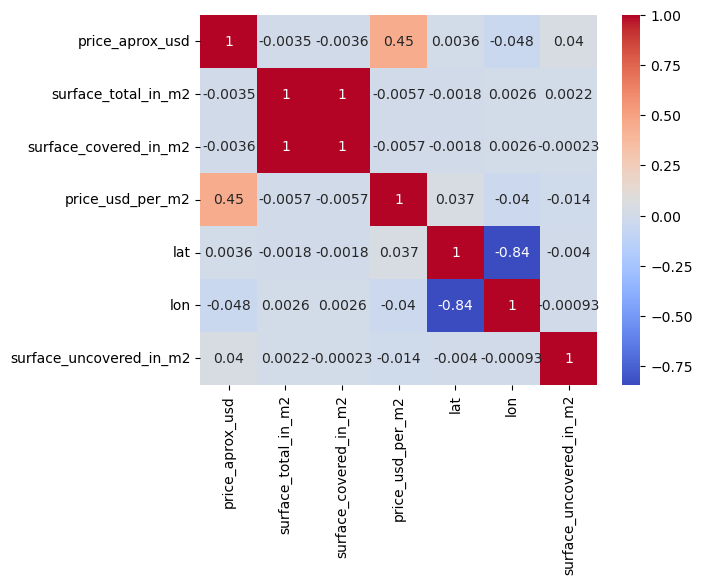

In [24]:
corr=housing.select_dtypes(include="number").corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

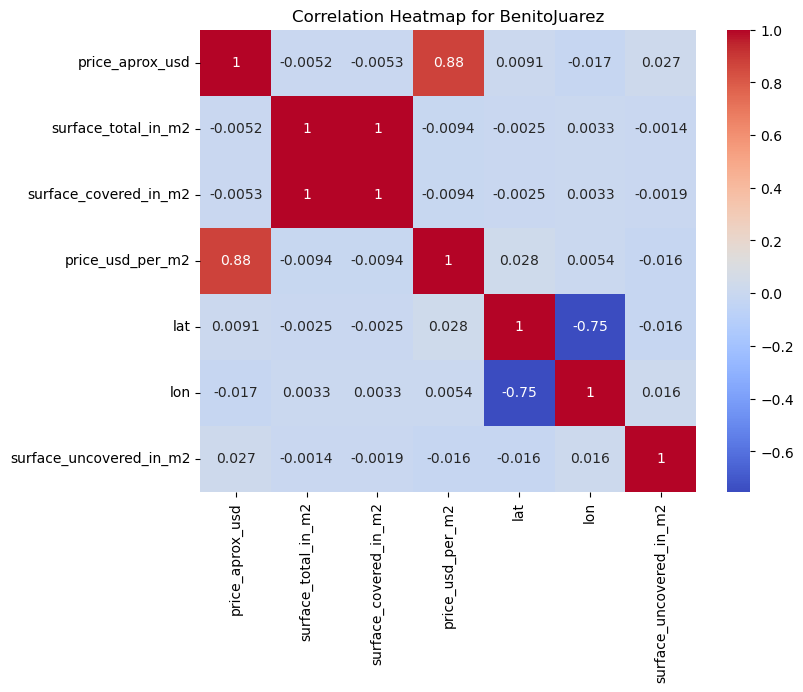

In [25]:
# Finding Most repeated place
most_common_place = housing['places'].value_counts().idxmax()

subset = housing[housing['places'] == most_common_place]

corr = subset.select_dtypes(include="number").corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title(f"Correlation Heatmap for {most_common_place}")
plt.show()

Noticed Abnormal Distribution of surface_uncovered_in_m2

# Data Cleaning

In [28]:
#Notice that surface_uncovered_in_m2 have Q1,Q2,Q3 of 0
housing.describe()

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,lat,lon,surface_uncovered_in_m2
count,14401.00,14401.00,14401.00,14401.00,14401.00,14401.00,14401.00
mean,276181.27,5104.24,5067.52,1475.07,19.45,-99.21,36.71
std,531934.92,548294.18,548292.92,2312.12,0.52,0.41,1309.00
min,5796.88,1.00,1.00,0.00,19.19,-102.55,0.00
25%,55860.91,69.00,68.00,649.80,19.35,-99.20,0.00
50%,115937.75,95.00,95.00,1034.01,19.39,-99.16,0.00
75%,252752.73,200.00,197.00,1861.59,19.43,-99.14,0.00
max,17890000.00,65748000.00,65748000.00,175917.69,41.58,-90.49,84266.00


In [29]:
housing["property_type"].unique()

array(['apartment', 'house', 'store', 'PH'], dtype=object)

In [30]:
housing[housing["property_type"]=="PH"]

,property_type,places,lat-lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,lat,lon,surface_uncovered_in_m2
1865,PH,Cuauhtemoc,"19.4283925,-99.1542591",239587.95,143.00,143.00,1675.44,19.43,-99.15,0.00
3033,PH,BenitoJuarez,"19.3699084,-99.1452148",384494.95,176.00,176.00,2184.63,19.37,-99.15,0.00
4460,PH,BenitoJuarez,"19.3866412,-99.1805935",677507.36,313.00,313.00,2164.56,19.39,-99.18,0.00
5724,PH,MiguelHidalgo,"19.4449663,-99.202496",598919.97,293.00,293.00,2044.10,19.44,-99.20,0.00
6345,PH,MiguelHidalgo,"19.437185,-99.2031466",1090312.66,251.00,251.00,4343.88,19.44,-99.20,0.00
6661,PH,BenitoJuarez,"19.3666304,-99.1740215",490700.24,235.00,235.00,2088.09,19.37,-99.17,0.00
11410,PH,BenitoJuarez,"19.3626004,-99.1577978",275907.24,201.00,201.00,1372.67,19.36,-99.16,0.00
12309,PH,Cuauhtemoc,"19.4283925,-99.1542591",184527.16,121.00,121.00,1525.02,19.43,-99.15,0.00
12435,PH,MiguelHidalgo,"19.4449663,-99.202496",549774.54,288.00,288.00,1908.94,19.44,-99.20,0.00
14453,PH,MiguelHidalgo,"19.4338054,-99.1922219",2256896.00,349.00,349.00,6466.75,19.43,-99.19,0.00


## Cleaning Uncovered Space

In [32]:
housing[housing["surface_uncovered_in_m2"]>0]["property_type"].unique()

array(['house', 'apartment', 'store'], dtype=object)

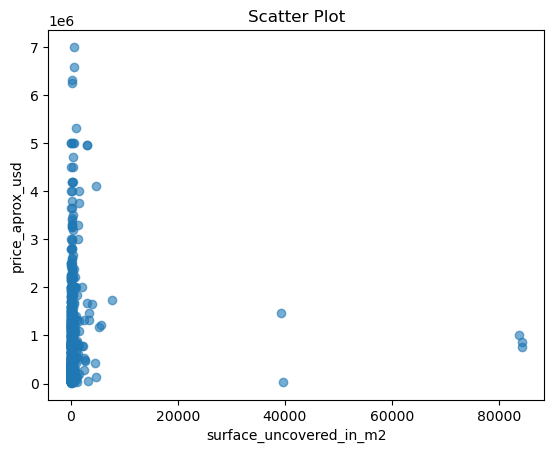

In [33]:
housing_outside=housing[housing["surface_uncovered_in_m2"]>0]
plt.scatter(x=housing_outside["surface_uncovered_in_m2"], y=housing_outside["price_aprox_usd"], alpha=0.6)
plt.xlabel("surface_uncovered_in_m2")
plt.ylabel("price_aprox_usd")
plt.title("Scatter Plot")
plt.show()

In [34]:
# From the plot we noticed very strange surface uncoverd for 5 data points
# and what's more strange is that prices doesn't match
housing[housing["surface_uncovered_in_m2"]>20000]

,property_type,places,lat-lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,lat,lon,surface_uncovered_in_m2
1182,house,Tlalpan,"19.267261,-99.146568",1475571.38,40000.00,660.00,36.89,19.27,-99.15,39340.00
4147,apartment,Cuajimalpa,"19.390415,-99.254997",1005285.70,84000.00,312.00,11.97,19.39,-99.25,83688.00
7688,apartment,Cuajimalpa,"19.3929373,-99.2633141",859877.76,84500.00,269.00,10.18,19.39,-99.26,84231.00
12246,apartment,Azcapotzalco,"19.472863741,-99.1669535637",41095.45,39736.00,77.00,1.03,19.47,-99.17,39659.00
17269,apartment,Cuajimalpa,"19.3944524568,-99.2639100552",769405.08,84500.00,234.00,9.11,19.39,-99.26,84266.00


Dropped All that have surface_uncovered_in_m2 greater than 20000

In [36]:
housing=housing[~(housing["surface_uncovered_in_m2"]>20000)]

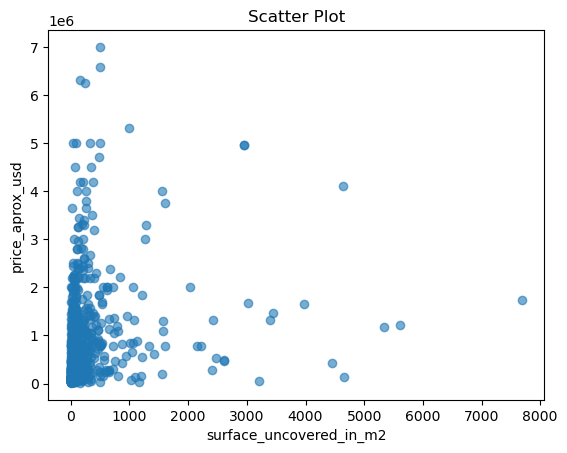

In [37]:
housing_outside=housing[housing["surface_uncovered_in_m2"]>0]
plt.scatter(x=housing_outside["surface_uncovered_in_m2"], y=housing_outside["price_aprox_usd"], alpha=0.6)
plt.xlabel("surface_uncovered_in_m2")
plt.ylabel("price_aprox_usd")
plt.title("Scatter Plot")
plt.show()

In [38]:
# these data points are completely normal
housing[housing["surface_uncovered_in_m2"]>5000]

,property_type,places,lat-lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,lat,lon,surface_uncovered_in_m2
6021,house,Tlalpan,"19.2486236,-99.187689",1212076.49,6710.00,1100.00,180.64,19.25,-99.19,5610.00
14466,house,Tlalpan,"19.2790911,-99.2114234",1185445.88,6440.00,1100.00,184.08,19.28,-99.21,5340.00
15541,house,Tlalpan,"19.288275,-99.167125",1738653.96,8285.00,600.00,209.86,19.29,-99.17,7685.00


In [39]:
housing.describe()

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,lat,lon,surface_uncovered_in_m2
count,14396.00,14396.00,14396.00,14396.00,14396.00,14396.00,14396.00
mean,275988.84,5082.90,5069.18,1475.58,19.45,-99.21,13.72
std,531856.88,548388.05,548388.12,2312.36,0.52,0.41,160.54
min,5796.88,1.00,1.00,0.00,19.19,-102.55,0.00
25%,55860.91,69.00,68.00,650.15,19.35,-99.20,0.00
50%,115924.01,95.00,95.00,1034.08,19.39,-99.16,0.00
75%,252415.45,200.00,197.00,1862.87,19.43,-99.14,0.00
max,17890000.00,65748000.00,65748000.00,175917.69,41.58,-90.49,7685.00


## Cleaning Covered Space

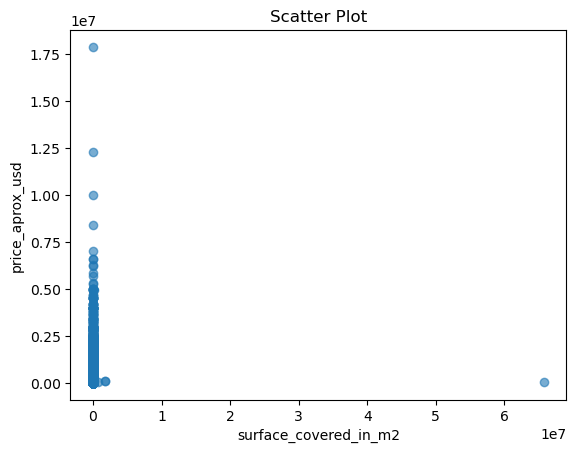

In [41]:
plt.scatter(x=housing["surface_covered_in_m2"], y=housing["price_aprox_usd"], alpha=0.6)
plt.xlabel("surface_covered_in_m2")
plt.ylabel("price_aprox_usd")
plt.title("Scatter Plot")
plt.show()

Abnormal meter prices dropped

In [43]:
housing[(housing["price_usd_per_m2"]<1)]

,property_type,places,lat-lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,lat,lon,surface_uncovered_in_m2
5605,apartment,VenustianoCarranza,"19.385304,-99.111639",40911.58,776510.00,776510.00,0.05,19.39,-99.11,0.00
5641,apartment,BenitoJuarez,"19.399831,-99.149236",91147.61,1730000.00,1730000.00,0.05,19.40,-99.15,0.00
5743,apartment,Cuajimalpa,"19.357350,-99.299792",89904.21,1706400.00,1706400.00,0.05,19.36,-99.30,0.00
8998,house,GustavoAMadero,"19.546048,-99.130236",81611.36,210000.00,210000.00,0.39,19.55,-99.13,0.00
16403,apartment,Iztapalapa,"19.337163,-99.080899",39418.83,65748000.00,65748000.00,0.00,19.34,-99.08,0.00


In [44]:
housing=housing[~(housing["price_usd_per_m2"]<1)]

## Cleaning Space Based on Property Type

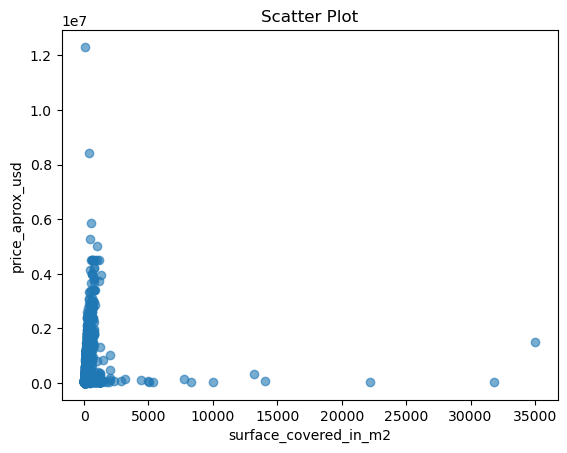

In [46]:
apartmentH=housing[housing["property_type"]=="apartment"]
plt.scatter(x=apartmentH["surface_covered_in_m2"], y=apartmentH["price_aprox_usd"], alpha=0.6)
plt.xlabel("surface_covered_in_m2")
plt.ylabel("price_aprox_usd")
plt.title("Scatter Plot")
plt.show()

In [47]:
housing[(housing["property_type"]=="apartment") & (housing["surface_covered_in_m2"]>1500)].shape

(21, 10)

Filtered out all houses with covered space more than 5000 m^2 and appartments with covered space more than 1500 m^2

In [49]:
housing=housing[~(housing["surface_covered_in_m2"]>5000)]
housing=housing[~((housing["property_type"]=="apartment") &(housing["surface_covered_in_m2"]>1500))]

Filtered out houses with covered space more than 2000 m^2

In [51]:
housing=housing[~((housing["surface_covered_in_m2"]>2000)&(housing["property_type"]=="house"))]

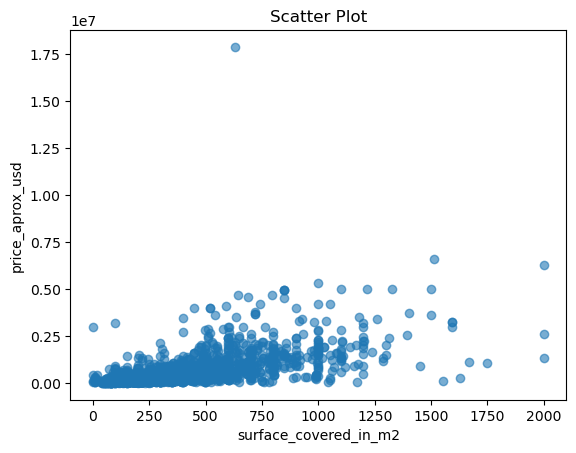

In [52]:
housH=housing[housing["property_type"]=="house"]
plt.scatter(x=housH["surface_covered_in_m2"], y=housH["price_aprox_usd"], alpha=0.6)
plt.xlabel("surface_covered_in_m2")
plt.ylabel("price_aprox_usd")
plt.title("Scatter Plot")
plt.show()

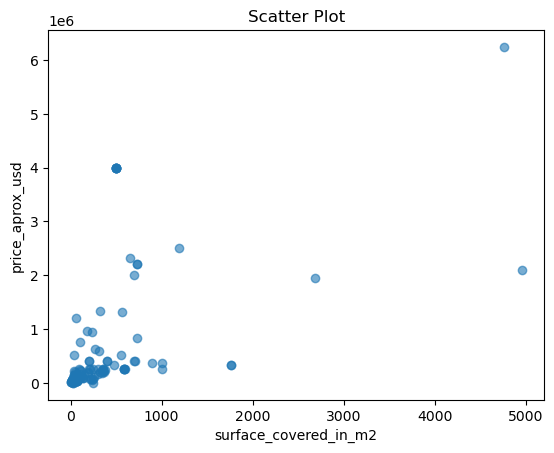

In [53]:
housH=housing[housing["property_type"]=="store"]
plt.scatter(x=housH["surface_covered_in_m2"], y=housH["price_aprox_usd"], alpha=0.6)
plt.xlabel("surface_covered_in_m2")
plt.ylabel("price_aprox_usd")
plt.title("Scatter Plot")
plt.show()

After trying to split with , we found that some rows are written with : so we used Regular Expression containing Both

## Cleaning Latitude-Longitude

### Splitting to Latitude & Longitude Columns

In [57]:
housing[["Latitude", "Longitude"]] = housing["lat-lon"].str.split(r"[:,]", expand=True)
housing["Latitude"] = pd.to_numeric(housing["Latitude"], errors="coerce")
housing["Longitude"] = pd.to_numeric(housing["Longitude"], errors="coerce")

In [58]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14355 entries, 0 to 18233
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            14355 non-null  object 
 1   places                   14355 non-null  object 
 2   lat-lon                  14355 non-null  object 
 3   price_aprox_usd          14355 non-null  float64
 4   surface_total_in_m2      14355 non-null  float64
 5   surface_covered_in_m2    14355 non-null  float64
 6   price_usd_per_m2         14355 non-null  float64
 7   lat                      14355 non-null  float64
 8   lon                      14355 non-null  float64
 9   surface_uncovered_in_m2  14355 non-null  float64
 10  Latitude                 14355 non-null  float64
 11  Longitude                14355 non-null  float64
dtypes: float64(9), object(3)
memory usage: 1.4+ MB


dropping lat-lon column

In [60]:
housing.drop("lat-lon", axis=1, inplace=True)

In [61]:
housing

,property_type,places,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,lat,lon,surface_uncovered_in_m2,Latitude,Longitude
0,apartment,MiguelHidalgo,289775.66,54.00,54.00,5366.22,23.63,-102.55,0.00,23.63,-102.55
1,house,Iztapalapa,79661.96,80.00,80.00,995.77,19.31,-99.07,0.00,19.31,-99.07
2,apartment,Tlalpan,48822.82,100.00,100.00,488.23,19.28,-99.23,0.00,19.28,-99.23
3,apartment,MiguelHidalgo,337720.36,135.00,135.00,2501.63,23.63,-102.55,0.00,23.63,-102.55
4,apartment,MiguelHidalgo,232663.51,87.00,87.00,2674.29,19.43,-99.18,0.00,19.43,-99.18
...,...,...,...,...,...,...,...,...,...,...,...
18228,house,Tlalpan,151210.20,100.00,100.00,1512.10,19.29,-99.11,0.00,19.29,-99.11
18229,apartment,Coyoacan,218880.72,157.00,157.00,1394.14,19.34,-99.16,0.00,19.34,-99.16
18230,house,AlvaroObregon,37229.08,105.00,105.00,354.56,19.34,-99.22,0.00,19.34,-99.22
18231,apartment,Cuauhtemoc,32764.67,130.00,130.00,252.04,19.41,-99.13,0.00,19.41,-99.13


### Restricting Lat and Lon to Mexico City

In [63]:
lat_min, lat_max = 19.0, 19.6
lon_min, lon_max = -99.33, -98.97

# Filter To mexico borders
housing = housing[(housing['lat'] >= lat_min) & (housing['lat'] <= lat_max) &
        (housing['lon'] >= lon_min) & (housing['lon'] <= lon_max)]


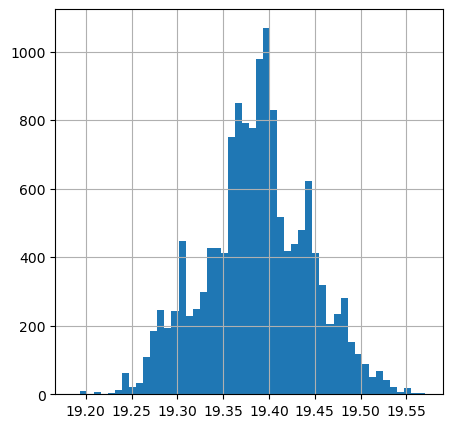

In [64]:
housing['lat'].hist(figsize=(5, 5), bins = 50)
plt.show()

In [65]:
housing.to_excel("housing.xlsx", index=True)

In [66]:
housing['places'].nunique()

16

In [67]:
housing = pd.get_dummies(housing, columns=['places'], drop_first=True)
housing = pd.get_dummies(housing, columns=['property_type'], drop_first=True)

In [68]:
housing = housing.applymap(lambda x: 1 if x is True else (0 if x is False else x))

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_17980\1976787634.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  housing = housing.applymap(lambda x: 1 if x is True else (0 if x is False else x))


In [69]:
housing

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,lat,lon,surface_uncovered_in_m2,Latitude,Longitude,places_Azcapotzalco,...,places_MagdalenaContreras,places_MiguelHidalgo,places_MilpaAlta,places_Tlahuac,places_Tlalpan,places_VenustianoCarranza,places_Xochimilco,property_type_apartment,property_type_house,property_type_store
1,79661.96,80.00,80.00,995.77,19.31,-99.07,0.00,19.31,-99.07,0,...,0,0,0,0,0,0,0,0,1,0
2,48822.82,100.00,100.00,488.23,19.28,-99.23,0.00,19.28,-99.23,0,...,0,0,0,0,1,0,0,1,0,0
4,232663.51,87.00,87.00,2674.29,19.43,-99.18,0.00,19.43,-99.18,0,...,0,1,0,0,0,0,0,1,0,0
5,166001.78,100.00,100.00,1660.02,19.37,-99.17,0.00,19.37,-99.17,0,...,0,0,0,0,0,0,0,1,0,0
6,109939.09,205.00,205.00,536.29,19.34,-99.23,0.00,19.34,-99.23,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18228,151210.20,100.00,100.00,1512.10,19.29,-99.11,0.00,19.29,-99.11,0,...,0,0,0,0,1,0,0,0,1,0
18229,218880.72,157.00,157.00,1394.14,19.34,-99.16,0.00,19.34,-99.16,0,...,0,0,0,0,0,0,0,1,0,0
18230,37229.08,105.00,105.00,354.56,19.34,-99.22,0.00,19.34,-99.22,0,...,0,0,0,0,0,0,0,0,1,0
18231,32764.67,130.00,130.00,252.04,19.41,-99.13,0.00,19.41,-99.13,0,...,0,0,0,0,0,0,0,1,0,0


In [70]:
housing

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,lat,lon,surface_uncovered_in_m2,Latitude,Longitude,places_Azcapotzalco,...,places_MagdalenaContreras,places_MiguelHidalgo,places_MilpaAlta,places_Tlahuac,places_Tlalpan,places_VenustianoCarranza,places_Xochimilco,property_type_apartment,property_type_house,property_type_store
1,79661.96,80.00,80.00,995.77,19.31,-99.07,0.00,19.31,-99.07,0,...,0,0,0,0,0,0,0,0,1,0
2,48822.82,100.00,100.00,488.23,19.28,-99.23,0.00,19.28,-99.23,0,...,0,0,0,0,1,0,0,1,0,0
4,232663.51,87.00,87.00,2674.29,19.43,-99.18,0.00,19.43,-99.18,0,...,0,1,0,0,0,0,0,1,0,0
5,166001.78,100.00,100.00,1660.02,19.37,-99.17,0.00,19.37,-99.17,0,...,0,0,0,0,0,0,0,1,0,0
6,109939.09,205.00,205.00,536.29,19.34,-99.23,0.00,19.34,-99.23,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18228,151210.20,100.00,100.00,1512.10,19.29,-99.11,0.00,19.29,-99.11,0,...,0,0,0,0,1,0,0,0,1,0
18229,218880.72,157.00,157.00,1394.14,19.34,-99.16,0.00,19.34,-99.16,0,...,0,0,0,0,0,0,0,1,0,0
18230,37229.08,105.00,105.00,354.56,19.34,-99.22,0.00,19.34,-99.22,0,...,0,0,0,0,0,0,0,0,1,0
18231,32764.67,130.00,130.00,252.04,19.41,-99.13,0.00,19.41,-99.13,0,...,0,0,0,0,0,0,0,1,0,0


# Scaling

## Scaling price_aprox_usd

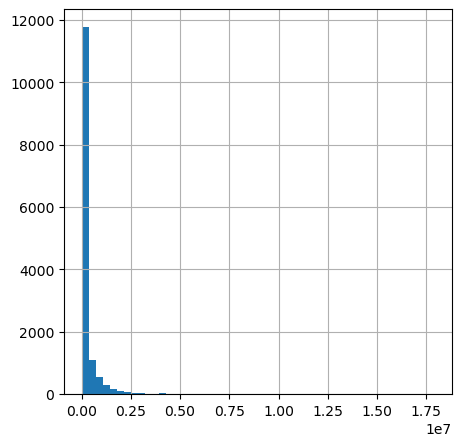

In [73]:
housing['price_aprox_usd'].hist(figsize=(5, 5), bins = 50)
plt.show()

In [74]:
housing.describe()

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,lat,lon,surface_uncovered_in_m2,Latitude,Longitude,places_Azcapotzalco,...,places_MagdalenaContreras,places_MiguelHidalgo,places_MilpaAlta,places_Tlahuac,places_Tlalpan,places_VenustianoCarranza,places_Xochimilco,property_type_apartment,property_type_house,property_type_store
count,14156.00,14156.00,14156.00,14156.00,14156.00,14156.00,14156.00,14156.00,14156.00,14156.00,...,14156.00,14156.00,14156.00,14156.00,14156.00,14156.00,14156.00,14156.00,14156.00,14156.00
mean,273073.30,180.34,166.60,1472.27,19.39,-99.16,13.75,19.39,-99.16,0.04,...,0.02,0.13,0.00,0.02,0.06,0.04,0.01,0.73,0.26,0.01
std,518226.68,269.61,190.34,2322.73,0.06,0.05,160.58,0.06,0.05,0.19,...,0.13,0.34,0.01,0.13,0.23,0.19,0.12,0.45,0.44,0.10
min,5796.88,1.00,1.00,14.82,19.19,-99.33,0.00,19.19,-99.33,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,55847.67,69.00,68.00,650.65,19.35,-99.19,0.00,19.35,-99.19,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,115910.26,95.00,94.00,1031.74,19.39,-99.16,0.00,19.39,-99.16,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,249286.52,200.00,195.00,1854.97,19.43,-99.14,0.00,19.43,-99.14,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00
max,17890000.00,8285.00,4957.00,175917.69,19.57,-98.97,7685.00,19.57,-98.97,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [75]:
housing['normallized_price'] = np.log(housing['price_aprox_usd'])

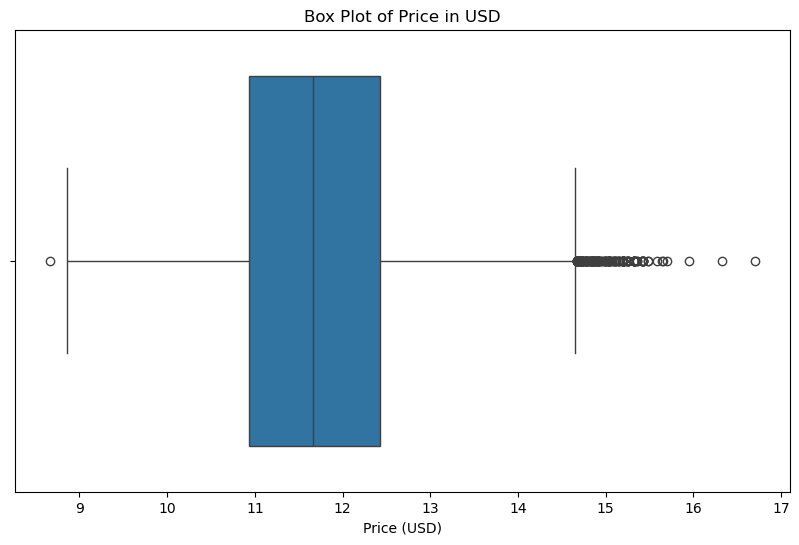

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=housing['normallized_price'])
plt.xlabel('Price (USD)')
plt.title('Box Plot of Price in USD')
plt.show()

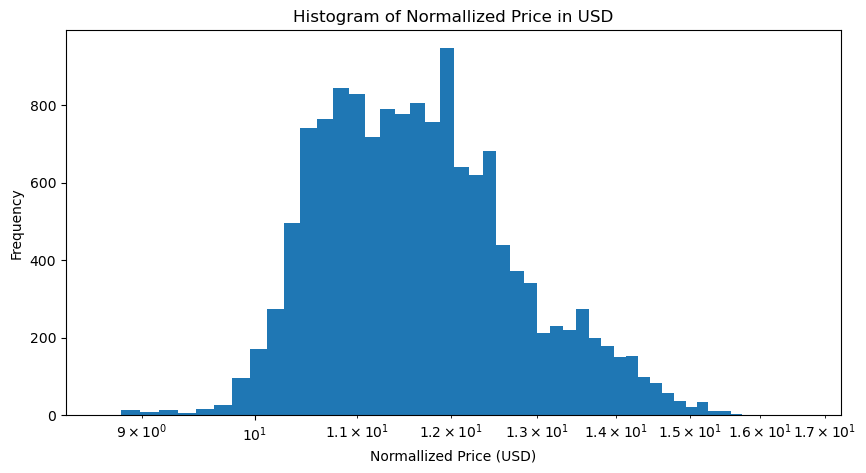

In [77]:
plt.figure(figsize=(10, 5))
plt.hist(housing['normallized_price'], bins=50)
plt.xlabel('Normallized Price (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Normallized Price in USD')
plt.xscale('log')
plt.show()


In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on data and transform
scaled_values = scaler.fit_transform(housing[['normallized_price']])
housing['scaled_price'] = scaled_values

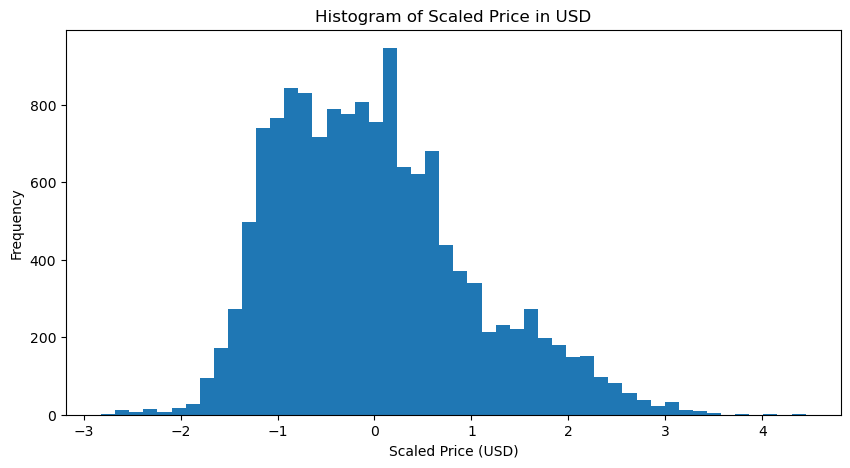

In [79]:
plt.figure(figsize=(10, 5))
plt.hist(housing['scaled_price'], bins=50)
plt.xlabel('Scaled Price (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Scaled Price in USD')
plt.show()


In [80]:
housing.drop(columns=['normallized_price', 'price_aprox_usd'], inplace=True)

## Scaling Price per m^2

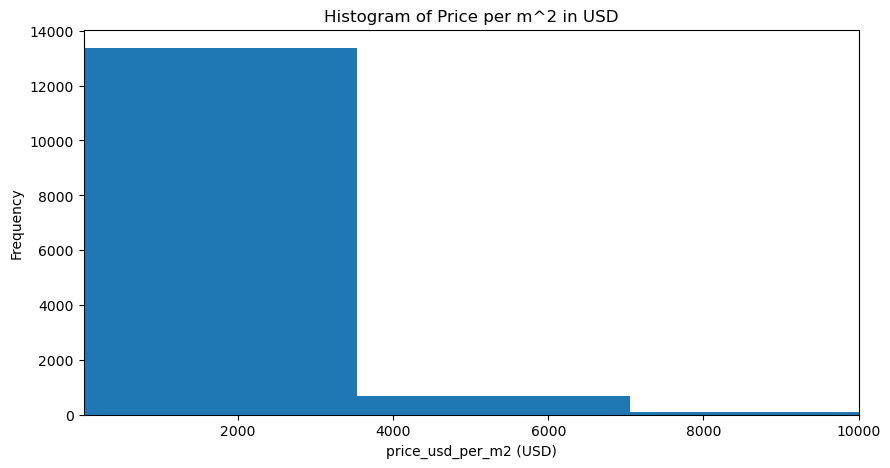

In [82]:
plt.figure(figsize=(10, 5))
plt.hist(housing['price_usd_per_m2'], bins=50)
plt.xlabel('price_usd_per_m2 (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Price per m^2 in USD')         # optional: log scale for wide-ranging prices
plt.xlim(10, 1e4)
plt.show()


In [83]:
housing['normallized_price_m2'] = np.log(housing['price_usd_per_m2'])

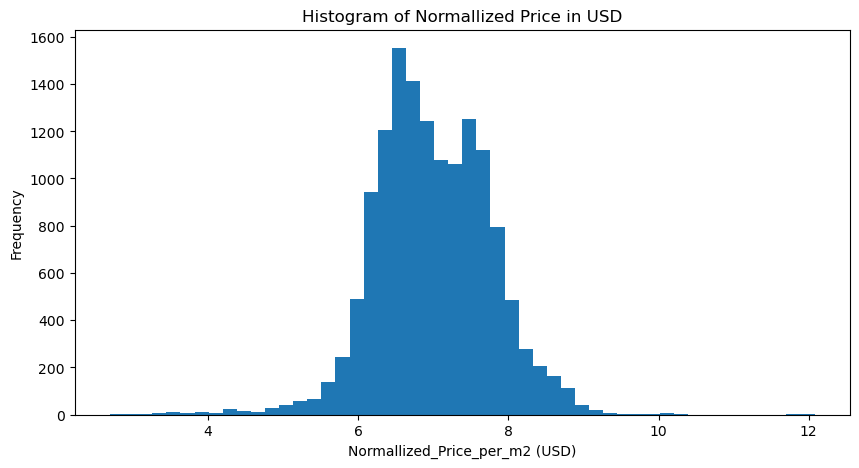

In [84]:
plt.figure(figsize=(10, 5))
plt.hist(housing['normallized_price_m2'], bins=50)
plt.xlabel('Normallized_Price_per_m2 (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Normallized Price in USD')         # optional: log scale for wide-ranging prices
plt.show()


In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on data and transform
scaled_values = scaler.fit_transform(housing[['normallized_price_m2']])
housing['scaled_price_m2'] = scaled_values

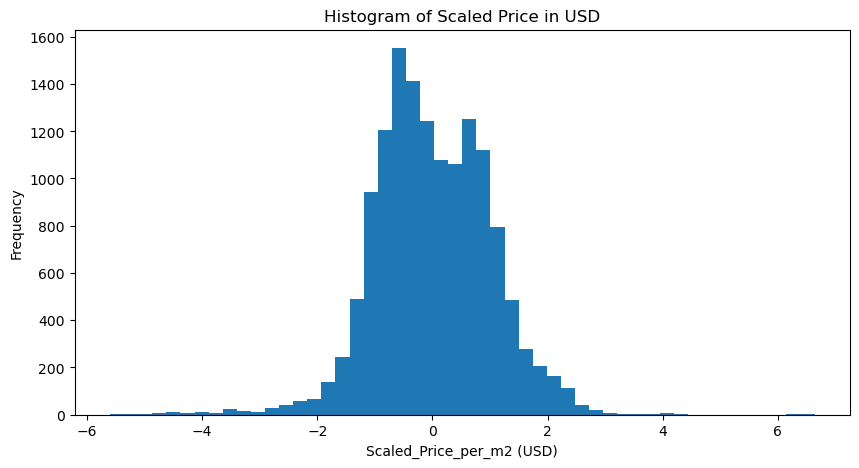

In [86]:
plt.figure(figsize=(10, 5))
plt.hist(housing['scaled_price_m2'], bins=50)
plt.xlabel('Scaled_Price_per_m2 (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Scaled Price in USD')         # optional: log scale for wide-ranging prices
plt.show()


## Scaling Total Surface Area

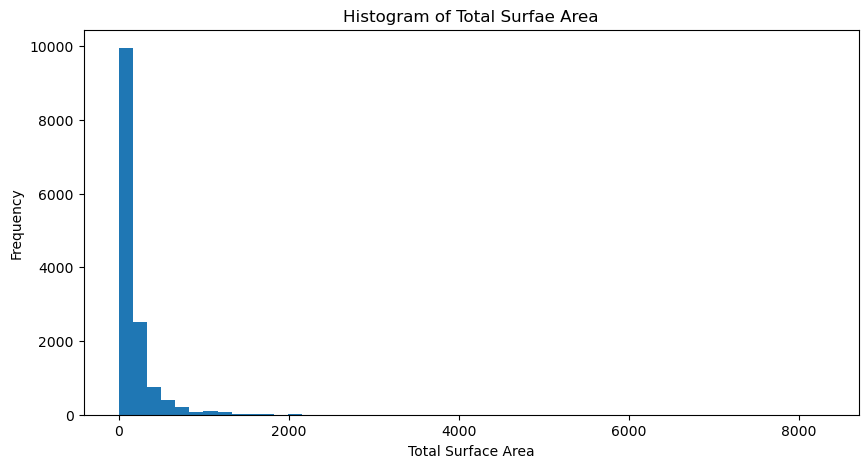

In [88]:
plt.figure(figsize=(10, 5))
plt.hist(housing['surface_total_in_m2'], bins=50)
plt.xlabel('Total Surface Area')
plt.ylabel('Frequency')
plt.title('Histogram of Total Surfae Area')         # optional: log scale for wide-ranging prices
plt.show()

In [89]:
housing['normallized_totalArea'] = np.log(housing['surface_total_in_m2'])

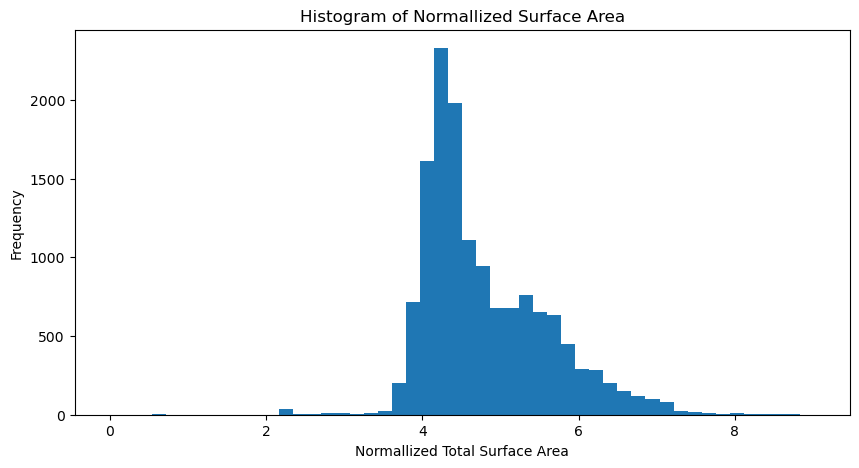

In [90]:
plt.figure(figsize=(10, 5))
plt.hist(housing['normallized_totalArea'], bins=50)
plt.xlabel('Normallized Total Surface Area')
plt.ylabel('Frequency')
plt.title('Histogram of Normallized Surface Area')         # optional: log scale for wide-ranging prices
plt.show()


No Standardization due to the persistent skewness

## Surface Covered Scaling

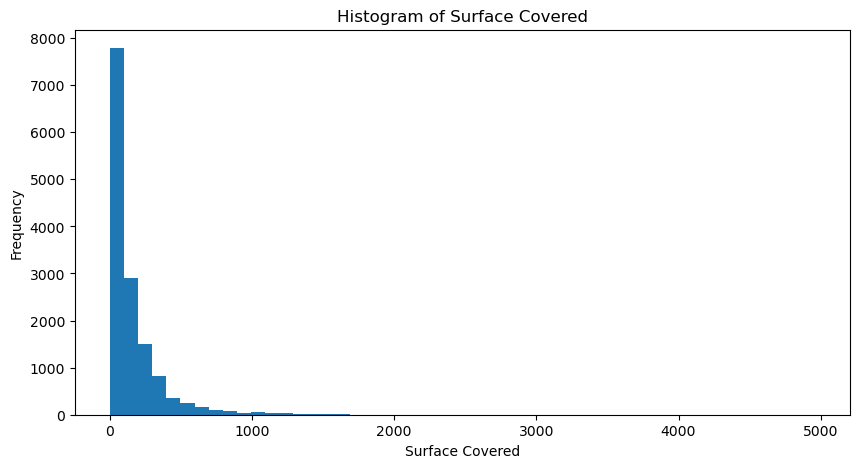

In [93]:
plt.figure(figsize=(10, 5))
plt.hist(housing['surface_covered_in_m2'], bins=50)
plt.xlabel('Surface Covered')
plt.ylabel('Frequency')
plt.title('Histogram of Surface Covered')         # optional: log scale for wide-ranging prices
plt.show()


In [94]:
housing['normallized_surface_covered_in_m2'] = np.log(housing['surface_covered_in_m2'])

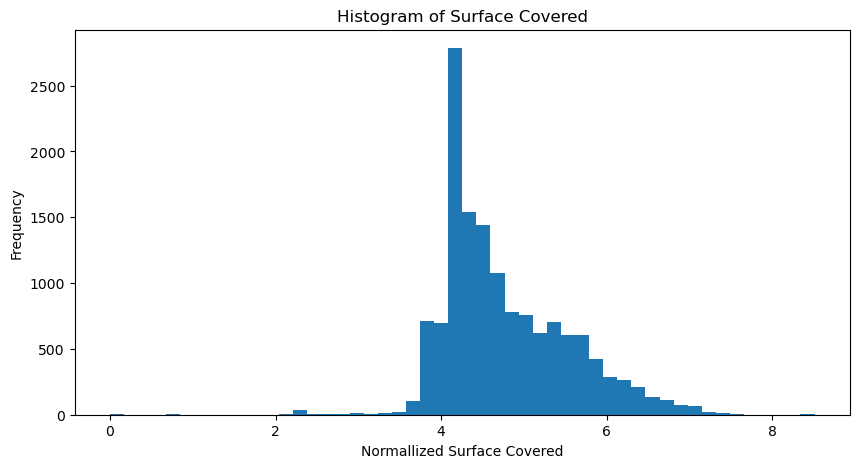

In [95]:
plt.figure(figsize=(10, 5))
plt.hist(housing['normallized_surface_covered_in_m2'], bins=50)
plt.xlabel('Normallized Surface Covered')
plt.ylabel('Frequency')
plt.title('Histogram of Surface Covered')         # optional: log scale for wide-ranging prices
plt.show()


No Standardization due to the persistent skewness

## Scaling Uncovered Space

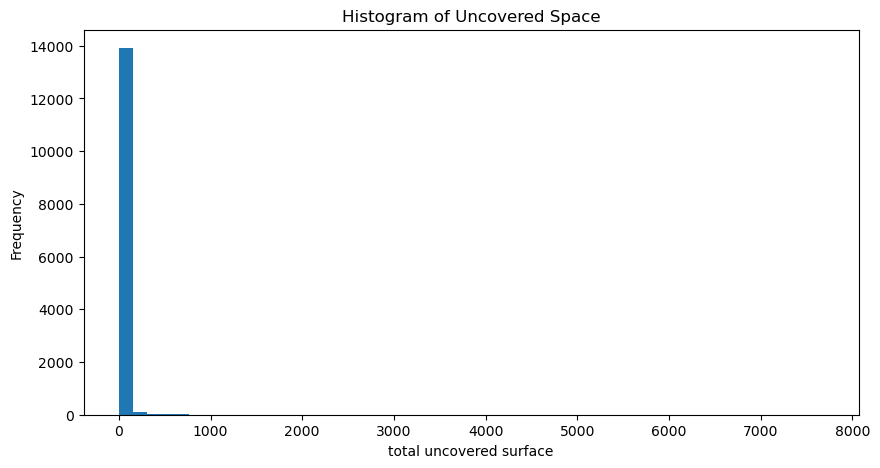

In [98]:
plt.figure(figsize=(10, 5))
plt.hist(housing['surface_uncovered_in_m2'], bins=50)
plt.xlabel('total uncovered surface')
plt.ylabel('Frequency')
plt.title('Histogram of Uncovered Space')         # optional: log scale for wide-ranging prices
plt.show()

In [99]:
housing['normallized_surface_uncovered_in_m2'] = np.log1p(housing['surface_uncovered_in_m2'])

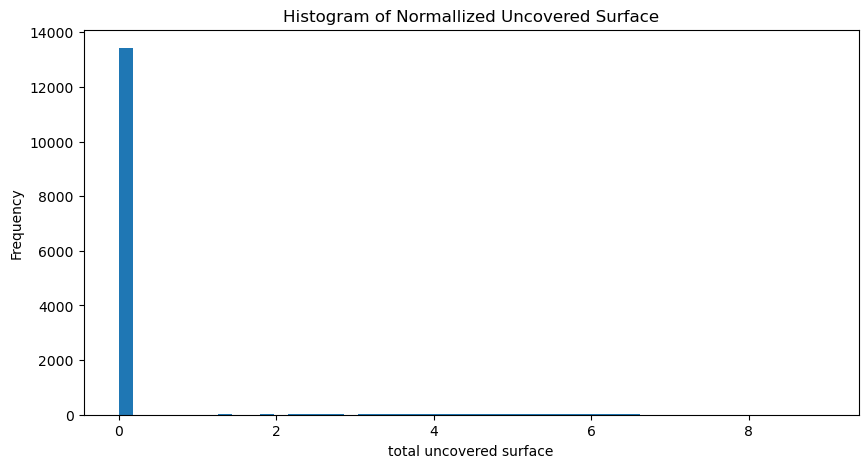

In [100]:
plt.figure(figsize=(10, 5))
plt.hist(housing['normallized_surface_uncovered_in_m2'], bins=50)
plt.xlabel('total uncovered surface')
plt.ylabel('Frequency')
plt.title('Histogram of Normallized Uncovered Surface')
plt.show()

In [101]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# Use double brackets for 2D input
surface_uncovered_scaled = scaler.fit_transform(
    housing[['normallized_surface_uncovered_in_m2']]
)

# If you want to store it back into the DataFrame
housing['surface_uncovered_scaled'] = surface_uncovered_scaled


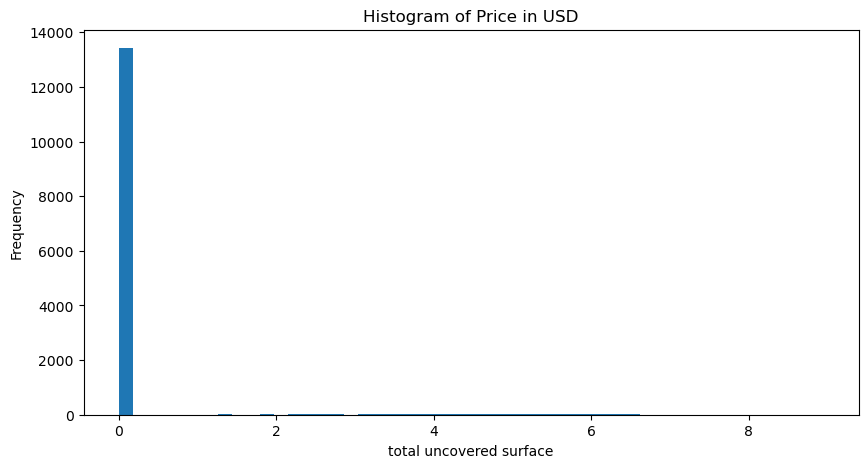

In [102]:
plt.figure(figsize=(10, 5))
plt.hist(housing['surface_uncovered_scaled'], bins=50)
plt.xlabel('total uncovered surface')
plt.ylabel('Frequency')
plt.title('Histogram of Price in USD')         # optional: log scale for wide-ranging prices
plt.show()

In [103]:
from sklearn.preprocessing import MaxAbsScaler

housing['log_surface_uncovered'] = np.log1p(housing['surface_uncovered_in_m2'])
scaler = MaxAbsScaler()
housing['scaled_surface_uncovered'] = scaler.fit_transform(
    housing[['log_surface_uncovered']]
)

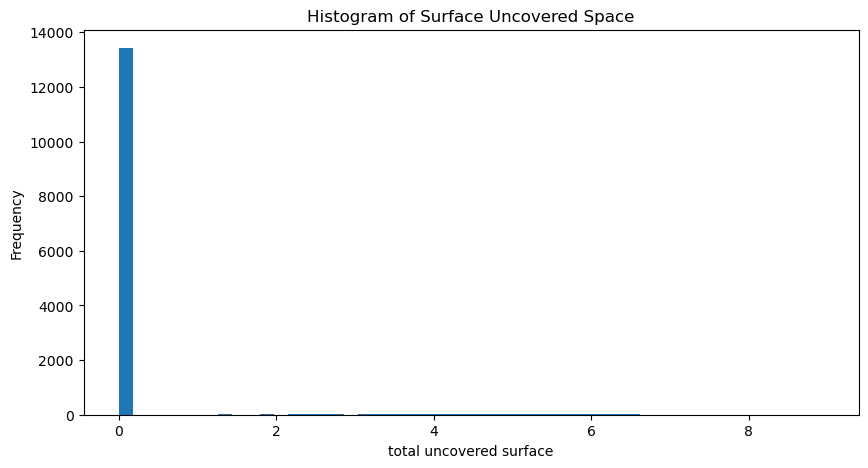

In [104]:
plt.figure(figsize=(10, 5))
plt.hist(housing['surface_uncovered_scaled'], bins=50)
plt.xlabel('total uncovered surface')
plt.ylabel('Frequency')
plt.title('Histogram of Surface Uncovered Space')         # optional: log scale for wide-ranging prices
plt.show()

In [105]:
housing.drop(columns=['lat', 'lon'], inplace=True)

In [106]:
housing

,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,surface_uncovered_in_m2,Latitude,Longitude,places_Azcapotzalco,places_BenitoJuarez,places_Coyoacan,places_Cuajimalpa,...,property_type_store,scaled_price,normallized_price_m2,scaled_price_m2,normallized_totalArea,normallized_surface_covered_in_m2,normallized_surface_uncovered_in_m2,surface_uncovered_scaled,log_surface_uncovered,scaled_surface_uncovered
1,80.00,80.00,995.77,0.00,19.31,-99.07,0,0,0,0,...,0,-0.45,6.90,-0.11,4.38,4.38,0.00,0.00,0.00,0.00
2,100.00,100.00,488.23,0.00,19.28,-99.23,0,0,0,0,...,0,-0.89,6.19,-1.04,4.61,4.61,0.00,0.00,0.00,0.00
4,87.00,87.00,2674.29,0.00,19.43,-99.18,0,0,0,0,...,0,0.52,7.89,1.18,4.47,4.47,0.00,0.00,0.00,0.00
5,100.00,100.00,1660.02,0.00,19.37,-99.17,0,1,0,0,...,0,0.21,7.41,0.55,4.61,4.61,0.00,0.00,0.00,0.00
6,205.00,205.00,536.29,0.00,19.34,-99.23,0,0,0,0,...,0,-0.16,6.28,-0.92,5.32,5.32,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18228,100.00,100.00,1512.10,0.00,19.29,-99.11,0,0,0,0,...,0,0.13,7.32,0.43,4.61,4.61,0.00,0.00,0.00,0.00
18229,157.00,157.00,1394.14,0.00,19.34,-99.16,0,0,1,0,...,0,0.46,7.24,0.33,5.06,5.06,0.00,0.00,0.00,0.00
18230,105.00,105.00,354.56,0.00,19.34,-99.22,0,0,0,0,...,0,-1.14,5.87,-1.46,4.65,4.65,0.00,0.00,0.00,0.00
18231,130.00,130.00,252.04,0.00,19.41,-99.13,0,0,0,0,...,0,-1.25,5.53,-1.91,4.87,4.87,0.00,0.00,0.00,0.00
